#What is The Project ?
 This project explores how the connectivity in large random networks affects the formation and size of clusters, a topic rooted in percolation theory.

Percolation theory examines how clusters of connected components change as the likelihood of connections between nodes increases. A critical concept here is the percolation threshold, where the network transitions from small, isolated clusters to a large, connected component.

In this project, we focus on Boolean networks modeled using Poisson processes on a two-dimensional plane. Points are randomly distributed, and connections are based on their Euclidean distance, with each point being the center of a disc of radius r. Two points are connected if their discs overlap.

##Our study involves:

1.Simulating the Boolean network for various densities λ.

2.Analyzing the size of the largest cluster formed in each simulation.

3.Identifying the critical density λc
​

where the network transitions to a large connected component.
Using simulation algorithms and clustering techniques, we compute the empirical averages of the largest cluster sizes and visualize the results to understand network behavior. This project not only deepens our understanding of percolation in Boolean networks but also has applications in fields like communication systems and epidemiology.

#Implement the Project

Given a random network, a cluster is a set of connected points and the cluster size is defined as the
number of nodes belonging to the cluster itself. Natural and relevant questions to address concern
the number of clusters present in the network and the size of the largest cluster.
The current project consists in what follows. Set r = 1 and take a squared domain A = [0; T]*[0; T],
with T > 0 large. Fix a value of λ and make M independent simulations of the Boolean random
network (X, λ, 1). Then, compute the empirical average of the M sizes of the largest cluster.
Clusters may be identified by using algorithms such as Depth First Search (DFS) or Breadth Search.
By running several simulations and collecting the results in appropriate plots, investigate the following
problems:

Task1
• How the size of the largest cluster depends on λ. Let 𝜆𝑐 ≈ 4.512/4𝜋 . You should be able to
identify two regimes: one for λ < λc where clusters are small and a different regime for λ > λc
where the largest cluster cover (almost all of) the network.

Task2
• (Optional) How the number of clusters depends on λ.

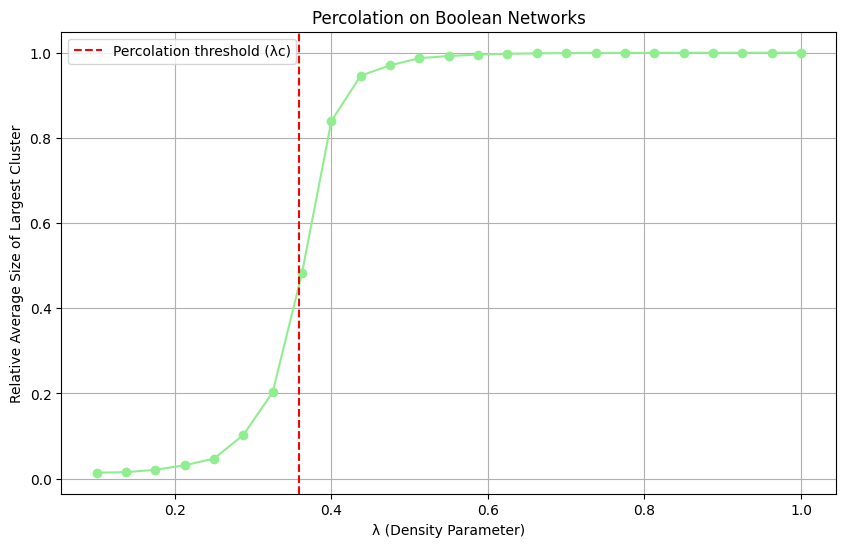

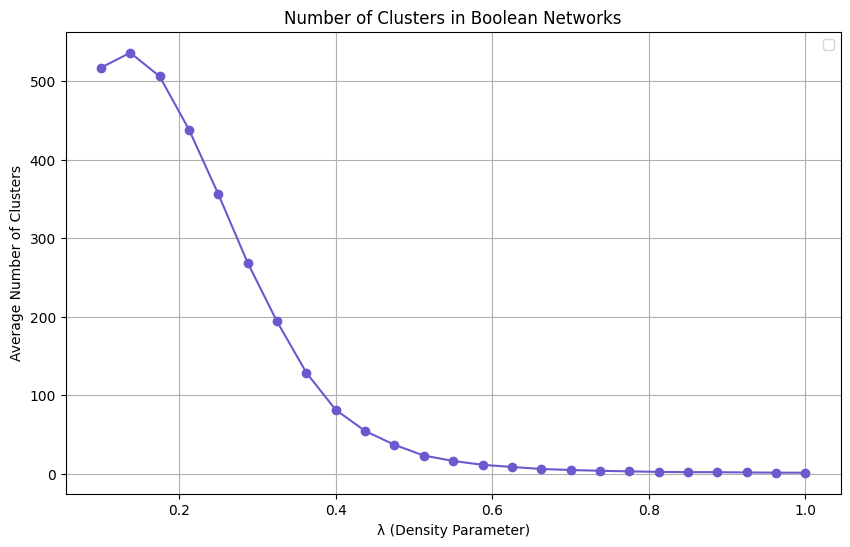

    Lambda (λ)  Average Size of Largest Cluster  Average Number of Clusters
0       0.1000                         0.014013                  516.866667
1       0.1375                         0.015352                  535.966667
2       0.1750                         0.020792                  505.900000
3       0.2125                         0.031585                  438.233333
4       0.2500                         0.047007                  355.966667
5       0.2875                         0.102495                  268.566667
6       0.3250                         0.202771                  193.833333
7       0.3625                         0.482578                  128.633333
8       0.4000                         0.839534                   81.366667
9       0.4375                         0.946042                   54.466667
10      0.4750                         0.970401                   36.900000
11      0.5125                         0.987093                   23.200000
12      0.55

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from scipy.spatial import KDTree
import itertools

# Generates Poisson points within a domain
def generate_poisson_points(lambda_density, T):
    N = np.random.poisson(lambda_density * T**2) #number of points is generated has Poisson λT**2 distributionss
    return np.random.uniform(0, T, (N, 2)), N

# Creates a Boolean network based on proximity within a threshold
def create_boolean_network(points, r):
    tree = KDTree(points)
    pairs = tree.query_pairs(2 * r)
    G = nx.Graph()
    for i, point in enumerate(points):
        G.add_node(i, pos=point)
    G.add_edges_from(pairs)
    return G

# Determines the size of the largest cluster in the graph using dfs
def largest_cluster_size(G):
    clusters = nx.connected_components(G)
    largest_cluster = max(clusters, key=len)
    return len(largest_cluster)

# Counts the total number of clusters in the graph
def number_of_clusters(G):
    clusters = nx.connected_components(G)
    return len(list(clusters))

# Simulates networks and calculates average cluster metrics
def simulate_boolean_networks(T, λ, r, M):
    relative_largest_cluster_sizes = []
    cluster_counts = []

    for _ in range(M):
        points, N = generate_poisson_points(λ, T)
        if N > 0:
            G = create_boolean_network(points, r)
            size = largest_cluster_size(G)
            relative_size = size / N
            relative_largest_cluster_sizes.append(relative_size)

            count = number_of_clusters(G)
            cluster_counts.append(count)
        else:
            relative_largest_cluster_sizes.append(0)
            cluster_counts.append(0)

    largest_cluster_mean = np.mean(relative_largest_cluster_sizes)
    average_cluster_count = np.mean(cluster_counts)
    return largest_cluster_mean, average_cluster_count

# Parameters for simulation
T = 100
r = 1
lambdas = np.linspace(0.1, 1, 25)
M = 30

# Run simulations and collect results
relative_largest_cluster_sizes = []
average_number_of_clusters = []

for λ in lambdas:
    avg_size, avg_num = simulate_boolean_networks(T, λ, r, M)
    relative_largest_cluster_sizes.append(avg_size)
    average_number_of_clusters.append(avg_num)

# Creating a table of results using pandas
results = pd.DataFrame({
    'Lambda (λ)': lambdas,
    'Average Size of Largest Cluster': relative_largest_cluster_sizes,
    'Average Number of Clusters': average_number_of_clusters
})

# Plotting results for the largest cluster and number of clusters
plt.figure(figsize=(10, 6))
plt.plot(lambdas, relative_largest_cluster_sizes, marker='o', linestyle='-', color='lightgreen')
plt.axvline(x=4.512 / (4 * np.pi), color='r', linestyle='--', label='Percolation threshold (λc)')
plt.xlabel('λ (Density Parameter)')
plt.ylabel('Relative Average Size of Largest Cluster')
plt.title('Percolation on Boolean Networks')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lambdas, average_number_of_clusters, marker='o', linestyle='-', color='slateblue')
plt.xlabel('λ (Density Parameter)')
plt.ylabel('Average Number of Clusters')
plt.title('Number of Clusters in Boolean Networks')
plt.legend()
plt.grid(True)
plt.show()

# Display results table
print(results)


#Conclusion
the study of Boolean networks demonstrates a significant shift in connectivity based on the density parameter, λ. When λ is below a critical value, approximately λc ≈ 4.512/4π, the network consists of many small, isolated clusters. This configuration indicates limited connectivity across the network.

As λ increases beyond this critical threshold, a large, interconnected cluster forms, signaling a major change in the network's structure. This shift is known as the percolation threshold, marking a point where the network transitions from being highly fragmented to extensively connected.

The results from our simulations clearly illustrate this transition, highlighting how changes in λ influence overall network connectivity. This understanding is crucial for grasping how complex networks behave and evolve, particularly in scenarios where network robustness and connectivity are critical.